In [1]:
import torch
from torch.utils.data import DataLoader

import sys, os
module_rootdir = '../../..'
dataset_rootdir = '../../../..'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
import numpy as np
from modules.dataset_utils.kitti_dataset_utils import constants
from modules.dataset_utils.kitti_objdetect_dataloader import KittiTrackingDataset_2DObjectDetection, inverse_norm
from modules.dataset_utils.kitti_dataset_utils.kitti_remap_utils import load_all_sequence_groundtruths_json
from modules.dataset_utils.kitti_dataset_utils.constants import _IDX_TO_OBJ_CLASS_ as idx_to_obj_class
from modules.plot.viz_annotation import vizualize_bbox_resized, vizualize_bbox_resized2

In [2]:
def infinite_loader(loader):
    """Get an infinite stream of batches from a data loader."""
    while True:
        yield from loader

In [3]:
BATCH_SIZE = 4
DEVICE = 'cuda'

img_h = constants._IMG_RESIZED_H_
img_w = constants._IMG_RESIZED_W_
img_d = constants._IMG_D_

gt_labels_train, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_train_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

gt_labels_val, _, _ = load_all_sequence_groundtruths_json(
    config_dataset.kitti_val_sequences_folders, 
    config_dataset.kitti_remapped_label_file_path, 
    label_rootdir, 
    dataset_rootdir)

# init data-loader
bdd_dataset = KittiTrackingDataset_2DObjectDetection(
    gt_labels = gt_labels_train, 
    image_new_shape = (img_d, img_h, img_w),
    device = DEVICE, 
    subset = -1,
    shuffle_dataset = True,
    augment = True,
    prob_augment = 0.5)

train_args = dict(batch_size=BATCH_SIZE, shuffle=False, collate_fn=bdd_dataset.collate_fn)
bdd_dataloader = DataLoader(bdd_dataset, **train_args)
bdd_dataloader = infinite_loader(bdd_dataloader)

Loading JSON file .. please wait
Sequence: 0000
Sequence: 0001
Sequence: 0002
Sequence: 0003
Sequence: 0004
Sequence: 0005
Sequence: 0006
Sequence: 0008
Sequence: 0009
Sequence: 0011
Sequence: 0012
Sequence: 0015
Sequence: 0016
Sequence: 0017
Sequence: 0019
Sequence: 0020
Loading JSON file .. please wait
Sequence: 0007
Sequence: 0010
Sequence: 0013
Sequence: 0014
Sequence: 0018


BATCH: 0
--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle']
bounding boxes
[[373.19696  121.32366  406.66196  142.37769 ]
 [423.39093  119.14952  512.14594  134.3895  ]
 [663.46594  103.90253  704.2341   123.50481 ]
 [497.554    112.91351  593.6427   147.11542 ]
 [772.57623   99.415405 869.65173  126.8286  ]
 [830.213     96.01731  872.2971   127.93278 ]
 [687.6392   103.846176 751.7402   123.7179  ]
 [675.387    104.910355 737.68915  123.70645 ]
 [357.15118  123.201035 385.82843  146.29848 ]
 [407.59464  120.05501  427.0134   134.96878 ]
 [609.4239   105.76013  638.17084  123.34743 ]
 [631.94196  106.51709  663.4456   122.66481 ]
 [463.00766  117.9697   484.127    132.53978 ]]


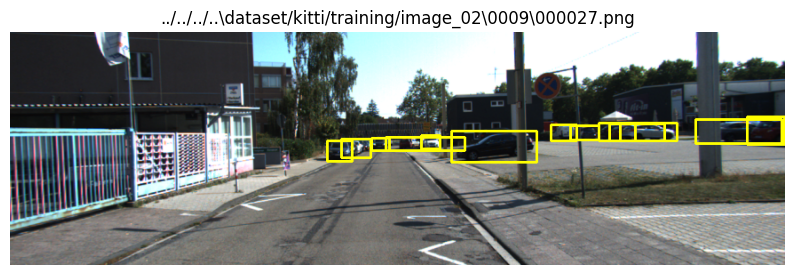

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'DontCare', 'person', 'vehicle']
bounding boxes
[[373.22516  123.06853  414.1673   158.67198 ]
 [521.3812   118.86334  562.27405  165.8869  ]
 [470.26352  126.93617  509.33698  166.89249 ]
 [405.01416  122.71693  429.1874   140.98628 ]
 [136.26294  102.677025 175.04724  197.84082 ]
 [329.74188  114.56204  388.42688  164.16454 ]]


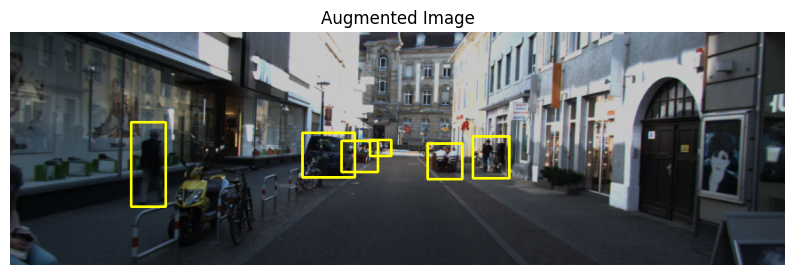

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle']
bounding boxes
[[779.5669    48.364326 785.23724   54.016365]
 [732.97894   44.324947 739.0538    50.38015 ]
 [719.5055    46.83445  731.4038    58.554108]
 [836.84863   46.341507 873.        57.70376 ]
 [213.43079   48.98458  236.49945   68.51473 ]
 [287.06116   52.72935  297.71448   66.208176]
 [306.26678   51.59351  320.0738    60.881767]
 [409.81082   55.225864 418.74127   65.32432 ]
 [243.01813   50.21175  253.57288   60.695835]
 [264.87085   50.705982 284.54797   68.20967 ]
 [321.47754   53.941887 346

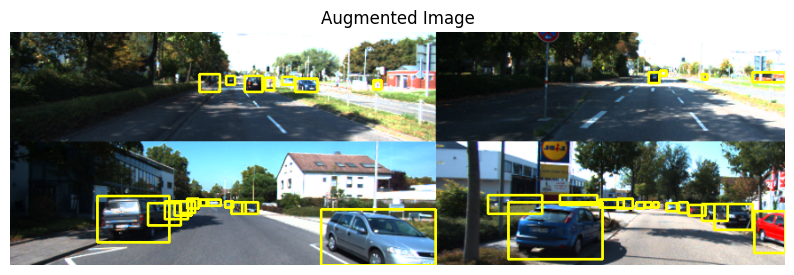

--------------------------------------------------
obj labels: 
['vehicle', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'vehicle']
bounding boxes
[[417.75137   63.367992 447.01816   77.29511 ]
 [128.0903    53.4994   181.31664   67.66619 ]
 [163.14804   59.1375   181.94629   70.57284 ]
 [ 62.179974  60.703644 102.975174  89.525764]
 [228.37018   64.16918  376.5446   135.06549 ]
 [179.6844    59.008385 221.00339   88.540855]
 [104.85509   58.05718  122.34417   71.15977 ]
 [242.67464   61.196808 296.26004   88.69742 ]
 [168.66347   59.45349  194.47197   77.87981 ]
 

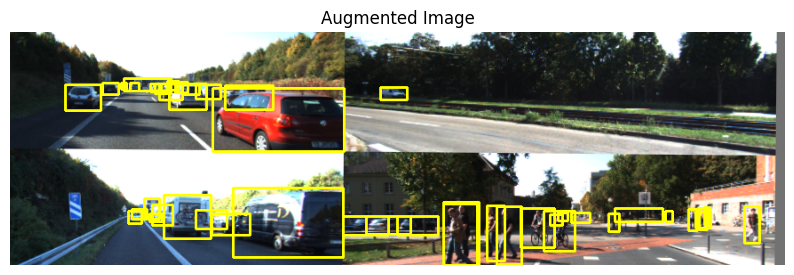

BATCH: 1
--------------------------------------------------
obj labels: 
['DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle']
bounding boxes
[[353.66342  119.57033  394.60727  136.68987 ]
 [383.57123  129.34311  417.08484  156.24713 ]
 [345.92862  126.41484  372.00854  146.37665 ]
 [535.85443  128.7145   578.9863   146.11009 ]
 [612.20984  130.10747  660.08813  148.94542 ]
 [387.65683  114.691574 405.6745   138.21634 ]]


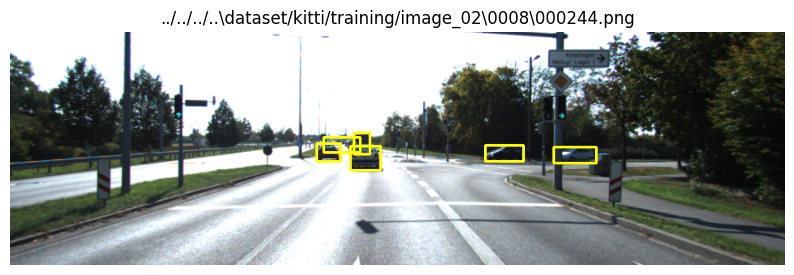

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'person', 'person', 'person']
bounding boxes
[[218.04364   41.097733 228.30795   49.678097]
 [198.55289   40.31659  217.74655   48.269627]
 [180.7267    40.66062  196.26154   48.79173 ]
 [ 60.45147   46.834614 128.10265   86.10682 ]
 [381.0987    45.33857  457.5412   121.247246]
 [288.80237   44.35541  409.82465  112.22322 ]
 [108.14758   44.994656 150.27489   70.24779 ]
 [258.30112   43.246273 313.85446   79.72252 ]
 [129.83987   44.680016 162.44035   63.47576 ]
 [242.29192   42.228153 281.08057   68.267235]
 [165.65555   42.38942  180.7055    53.511612]
 [236.87183   42.139557 263.20447   62.018497]
 [23

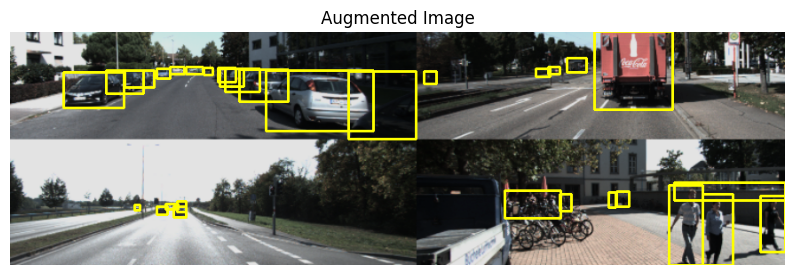

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'person', 'person', 'vehicle', 'vehicle']
bounding boxes
[[7.0289856e-01 1.2319622e+02 8.2281303e+01 1.7592947e+02]
 [6.2053998e+02 1.1486437e+02 6.7696863e+02 1.4464299e+02]
 [4.9652756e+02 8.1151283e+01 6.7385480e+02 1.3014644e+02]
 [6.3754963e+01 1.3339497e+02 2.3345540e+02 2.2256767e+02]
 [5.8929755e+02 1.2824216e+02 8.7229712e+02 2.6229868e+02]
 [5.1951733e+02 1.2788083e+02 6.6116626e+02 2.1992793e+02]
 [2.0048909e+02 1.3405333e+02 2.8528143e+02 1.8804961e+02]
 [5.5469373e+02 1.0795064e+02 5.6898602e+02 1.5885838e+02]
 [5.6211353e+02 1.0630488e+02 5.8038885e+02 1.5756015e+02]
 [4.9966406e+02 1.2777085e+02 5.7233453e+02 1.7851024e+02]
 [2.4779453e+02 1.2498533e+02 3.1276935e+02 1.5027066e+02]]


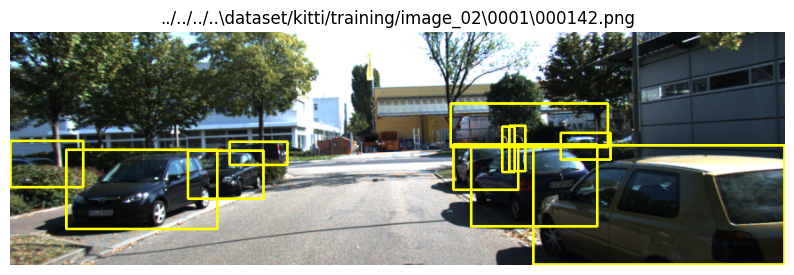

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'DontCare', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'person', 'person', 'person', 'vehicle']
bounding boxes
[[175.12155   59.074123 184.18254   66.70651 ]
 [223.5773    60.461185 230.89938   67.40004 ]
 [211.02774   55.95325  219.74382   65.31589 ]
 [234.49937   58.678795 245.73692   68.39029 ]
 [268.08875   61.548725 289.14764   70.66984 ]
 [648.3115    55.606487 659.49274   62.195004]
 [650.9031    61.143684 657.74225   66.52233 ]
 [255.78654  193.81458  261.0248   207.32275 ]
 [181.31189  197.94269  194.78482  203.19466 ]
 [119.18563  198.31732  125.92207  209.1995  ]
 [102.71993  196.44058  112.07552  210.32336 ]
 [211.67555  196.99596  221.56006  206.76755 ]
 [ 29.71214  204.9156    90.603676 230.80087 ]
 [ 74.53078  200.36563  108.34121  218

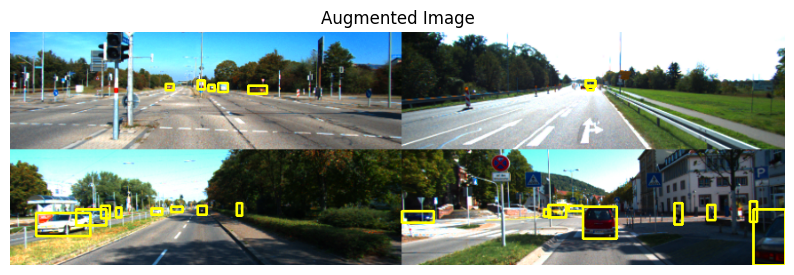

BATCH: 2
--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'vehicle', 'person']
bounding boxes
[[622.83276  108.96019  654.02966  138.48727 ]
 [399.1051   116.146484 422.56342  132.21793 ]
 [339.72824  113.9572   383.71347  137.33577 ]
 [  0.       142.7834   216.49355  262.2892  ]
 [707.2814   104.65478  734.3191   154.2831  ]]


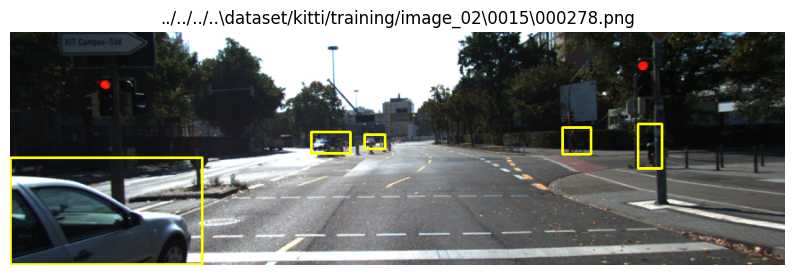

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'vehicle', 'vehicle', 'person', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'person']
bounding boxes
[[799.8837      0.        808.0827      7.001451 ]
 [240.18134     0.        256.44177    11.376917 ]
 [286.67944     0.        356.85742    22.14348  ]
 [192.25671     0.        210.80042     9.679883 ]
 [377.11008     0.        411.6271     13.644307 ]
 [183.6936      0.        204.33295    16.551483 ]
 [267.4972      1.3440787 419.70248    90.7774   ]
 [424.06073     7.6202817 467.9173     67.776115 ]
 [247.6247      3.5890286 299.5819     38.80361  ]
 [311.94086     2.4349866 379.266      34.436195 ]
 [360.19147     2.658602  422.3852     27.807323 ]
 [255.6554      0.        289.50323    17.944313 ]
 [219.14105     0.        248.10052    16.7615

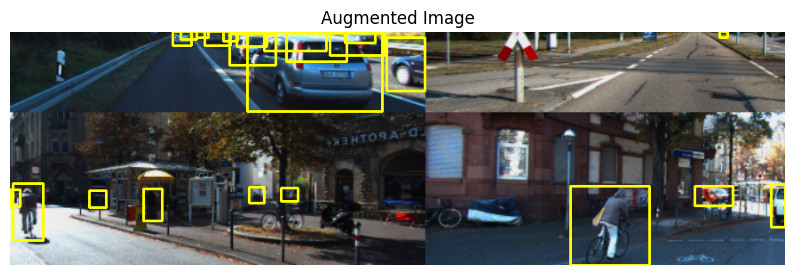

--------------------------------------------------
obj labels: 
['DontCare', 'vehicle', 'DontCare', 'vehicle', 'person', 'person', 'person', 'person', 'person', 'DontCare', 'vehicle']
bounding boxes
[[771.05005   33.07743  788.3625    44.118202]
 [714.09875   19.715006 739.6439    50.15306 ]
 [743.4043   172.96687  810.7984   190.3668  ]
 [833.8551   178.70813  873.       244.97481 ]
 [806.9987   170.54419  846.1402   232.98549 ]
 [701.1964   174.78479  715.4146   207.79027 ]
 [775.89026  178.17366  782.4386   197.72491 ]
 [771.2487   177.63756  779.39417  197.9992  ]
 [824.2156   175.58768  836.6567   198.23495 ]
 [244.9042   201.57849  290.68198  212.7063  ]
 [221.1576   193.24753  239.92969  215.72865 ]]


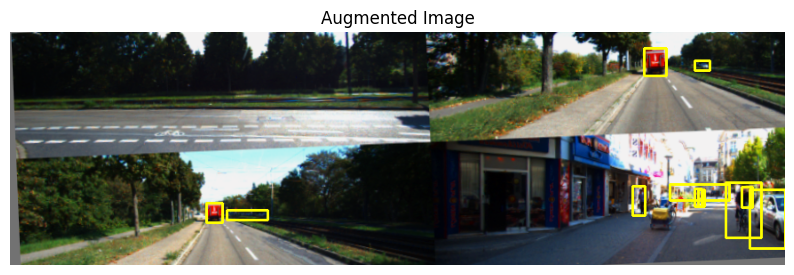

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle']
bounding boxes
[[345.69254  123.4487   371.32025  136.5987  ]
 [380.83746  124.17808  392.55478  134.41054 ]
 [438.679    121.98992  451.12732  144.63597 ]
 [405.4289   127.12996  424.80936  146.28833 ]
 [243.6818   113.832375 307.40207  143.63359 ]]


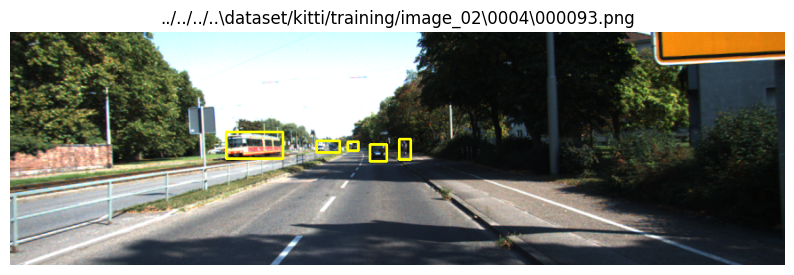

BATCH: 3
--------------------------------------------------
obj labels: 
['DontCare', 'vehicle', 'person', 'vehicle', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'vehicle', 'person', 'vehicle']
bounding boxes
[[ 38.995358  61.201855  73.70679   73.23322 ]
 [ 99.63437   53.216095 151.66608   93.953766]
 [267.86664   53.699863 340.8498   131.14934 ]
 [138.45279   57.703014 168.61792   72.78258 ]
 [616.0195    63.03233  622.5265    68.81834 ]
 [643.1686    50.612247 662.3174    73.64973 ]
 [203.36981  181.36165  223.54294  205.87563 ]
 [ 53.807068 202.04187   91.56701  219.11757 ]
 [108.05073  197.39719  128.20244  209.23662 ]
 [528.55817  198.17592  553.16327  209.94934 ]
 [585.83594  192.57542  596.44556  208.36635 ]
 [544.5104   191.63777  582.1618   226.15823 ]
 [676.26587  192.33217  740.51373  263.      ]
 [623.3682   191.68959  656.61163  208.73344 ]]


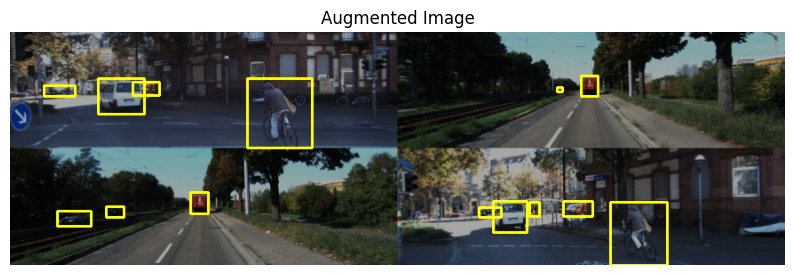

--------------------------------------------------
obj labels: 
['DontCare', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person']
bounding boxes
[[323.97607  118.58909  485.61508  158.0391  ]
 [294.35498  130.18227  338.04065  220.89655 ]
 [622.4226   116.473465 651.46936  184.52574 ]
 [256.46188  123.830635 278.98514  206.18762 ]
 [340.3163   122.16004  367.7113   186.56415 ]
 [550.381    114.407646 576.73157  172.55069 ]
 [416.36948  119.93041  433.03833  165.74202 ]
 [396.08405  121.38211  407.05273  158.87822 ]
 [398.45557  118.43211  411.782    153.05023 ]
 [488.361    117.91318  506.55194  155.4218  ]]


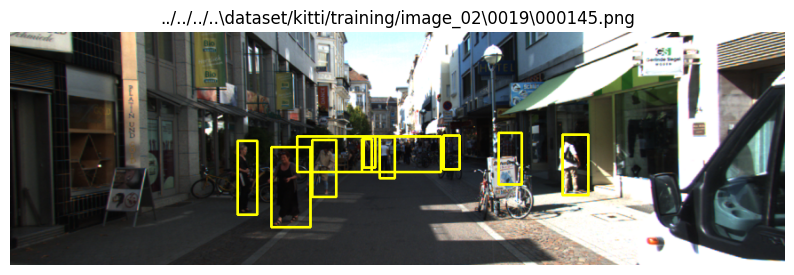

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle']
bounding boxes
[[415.60284  119.99112  435.95172  136.22699 ]
 [446.12268  123.967674 473.94342  142.20235 ]
 [342.9653   121.18338  390.07358  152.9608  ]
 [461.7481   101.5671   482.20953  132.19432 ]
 [  0.       146.5132   196.18839  257.69556 ]
 [152.08571  139.04834  263.54373  203.01642 ]
 [236.18375  136.03673  309.24902  178.14441 ]
 [645.2242    99.247475 804.93054  156.28781 ]
 [628.35345   99.4651   729.2799   150.10727 ]
 [592.5496   102.958206 694.9359   146.69363 ]
 [557.09314  109.421005 649.5612   145.38196 ]
 [294.08862  132.06772  343.82974  161.75937 ]
 [477.5452   122.88929  531.90625  161.01974 ]
 [469.23718  121.847466 507.7124   153.6959  ]]


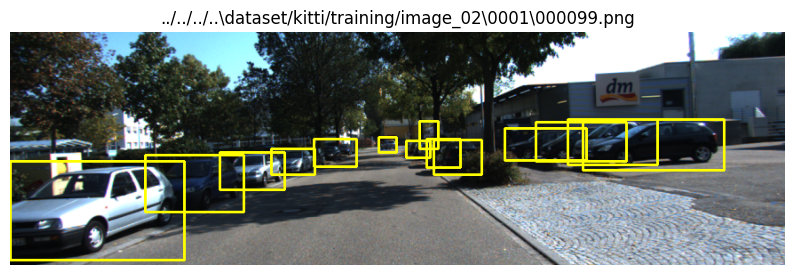

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'vehicle']
bounding boxes
[[387.19412  122.735664 426.40527  139.2641  ]
 [127.16536  113.83843  178.7434   138.8444  ]
 [279.34592  115.53114  364.1697   140.11745 ]
 [404.40396  121.79271  429.71948  144.73772 ]
 [  0.       143.42908   83.613976 217.97424 ]
 [159.70276  132.53561  294.27734  209.40129 ]
 [162.59782  123.82773  245.1895   169.80997 ]
 [279.85425  127.73909  340.8835   165.56721 ]
 [329.62567  127.26527  365.4436   151.10318 ]
 [362.57874  117.240776 385.98865  142.65851 ]
 [  0.       112.812386 124.02452  180.38637 ]]


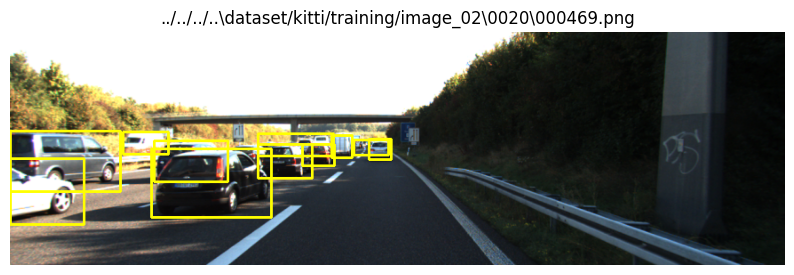

BATCH: 4
--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle']
bounding boxes
[[344.43436 124.70408 353.98672 136.27608]
 [377.17535 120.62232 400.364   132.87462]
 [397.17334 129.00018 424.5476  150.94157]
 [363.97833 129.79321 387.50223 147.08824]
 [404.9866  117.63434 421.8241  139.17432]]


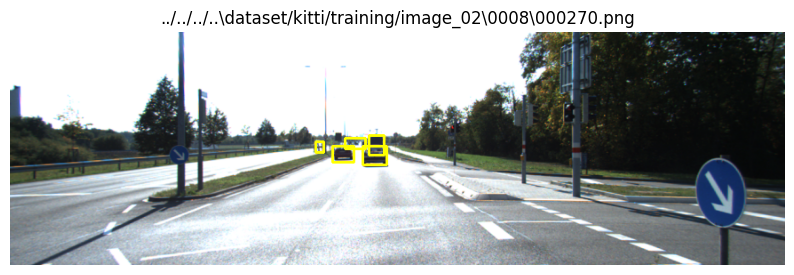

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'person', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'DontCare', 'vehicle', 'vehicle', 'vehicle', 'vehicle', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person']
bounding boxes
[[781.5378    26.108627 805.2106    38.35495 ]
 [840.733     21.479288 873.        38.7742  ]
 [803.8462    23.840296 818.4157    33.818306]
 [765.6039    25.654076 781.994     36.54117 ]
 [495.3917    33.457188 552.7821    56.040043]
 [524.83545   33.836235 579.6488    55.350044]
 [563.68146   32.780502 614.9772    55.949352]
 [755.2076    28.867287 770.27057   42.250862]
 [846.4028  

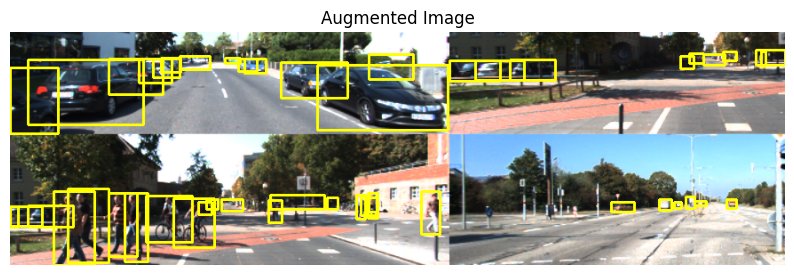

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'vehicle']
bounding boxes
[[608.3798   119.261734 621.34125  138.31696 ]
 [523.80707  126.06467  538.8139   138.31696 ]
 [535.35345  119.893166 570.87946  150.6326  ]]


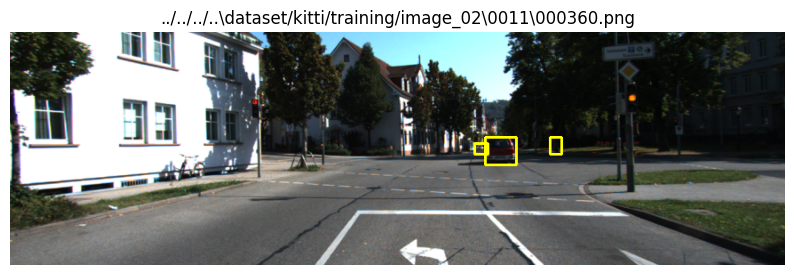

--------------------------------------------------
obj labels: 
['DontCare', 'DontCare', 'DontCare', 'DontCare', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'DontCare', 'person', 'vehicle', 'vehicle', 'vehicle']
bounding boxes
[[298.9778   117.077194 325.4358   167.52538 ]
 [ 93.886284 110.706116 156.88614  223.21248 ]
 [489.2326   124.179596 521.4659   157.0546  ]
 [350.77252  111.76093  448.9392   137.32959 ]
 [552.3913   113.094864 597.5107   255.70213 ]
 [616.1373   104.4307   685.429    255.2743  ]
 [146.50229  114.979576 197.18123  247.15823 ]
 [389.3042   114.41158  416.72693  183.71463 ]
 [511.93994  112.64611  532.9711   167.83522 ]
 [706.85736  107.33002  748.8658   192.41278 ]
 [810.5212    97.84622  856.4712   187.31235 ]
 [676.82104  106.17721  703.52625  175.49333 ]
 [362.22894  121.43947  376.93484  160.56557 ]
 [351.83963  136.7506   372.26273  161.83987 ]
 [348.60065  119.497505 363.4202   159.19342 ]
 [393.9534   117.15528

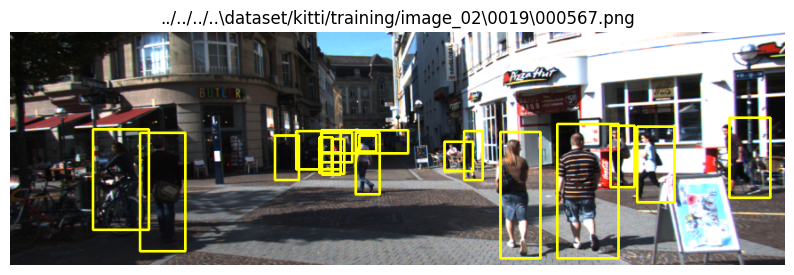

In [4]:
for iter in range(5):

    # if iter == 1:
    #     bdd_dataset.set_prob_augment(0.01)
    #     bdd_dataloader = DataLoader(bdd_dataset, **train_args)
    #     bdd_dataloader = infinite_loader(bdd_dataloader)
    
    # elif iter == 3:
    #     bdd_dataset.set_prob_augment(0.99)
    #     bdd_dataloader = DataLoader(bdd_dataset, **train_args)
    #     bdd_dataloader = infinite_loader(bdd_dataloader)

    images, labels = next(bdd_dataloader)       
    bbox_batch = labels['bbox_batch']             
    obj_class_label = labels['obj_class_label']  
    img_paths = labels['img_path']

    # for vizualization
    images_inv = inverse_norm(images)
    images_inv = (255.0 * images_inv.permute(0,2,3,1)).to(torch.uint8)
    
    print(f'BATCH: {iter}')
    print('=' * 100)      

    for sample_idx in range(len(obj_class_label)):
        image_np = images_inv[sample_idx].cpu().numpy()
        boxes = bbox_batch[sample_idx].cpu().numpy()
        cls = obj_class_label[sample_idx].cpu().numpy().tolist()
        img_path = img_paths[sample_idx]

        print('-' * 50)
        print('obj labels: ')
        print([idx_to_obj_class[id] for id in cls])
        print('bounding boxes')
        print(boxes)

        # vizualize_bbox_resized(img_path, boxes, config.IMG_RESIZED_W, config.IMG_RESIZED_H, figsize=(10,8))
        vizualize_bbox_resized2(img_path, image_np.copy(), boxes, figsize=(10,8))

        


        
    
